In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


이 데이터를 가지고 시각화를 하는게 마지막 목표? 파이썬으로

법정동에 따라 결제 금액에 따라서 gis

좌표가 있어야 한다.

지도를 거쳐서 대전 유성구 동 빈 사진을 보여준다.. 그다음 색깔을 입히는 구조 ₩금액을 sort해서

각 동의

데이터는 이그노어 처리

가장 의미있는 시각화를 하기 월별 혹은 연령별

1. 데이터를 가지고 동에 따른 의미 있는 처리를 한다. → 월별, 혹은 연령별 → 시각화로 파악
2. 대전 유성구를 동으로 나눈 색깔 없는 지도를 보여준다.
3. 의미 있는 처리를 한 값으로 색깔을 구분해서 색깔이 있는 지도를 보여준다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,533 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and dire

In [3]:
for font in fm.findSystemFonts():
    if 'Nanum' in font:
        print(font)

/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf
/usr/share/fonts/truetype/nanum/NanumGothic.ttf
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf


In [4]:
file_path_2020 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_2020.csv'
file_path_2021 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_2021.csv'
file_path_20220103 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_2022_01-03.csv'
file_path_202204 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202204.csv'
file_path_202205 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202205.csv'
file_path_202206 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202206.csv'
file_path_202207 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202207.csv'
file_path_202208 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202208.csv'
file_path_202209 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202209.csv'
file_path_202210 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202210.csv'
file_path_202211 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202211.csv'
file_path_202212 = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231/유성구_외국인소비정보_202212.csv'

data_2020 = pd.read_csv(file_path_2020, encoding='cp949')
data_2021 = pd.read_csv(file_path_2021, encoding='cp949')
data_20220103 = pd.read_csv(file_path_20220103, encoding='cp949')
data_202204 = pd.read_csv(file_path_202204, encoding='cp949')
data_202205 = pd.read_csv(file_path_202205, encoding='cp949')
data_202206 = pd.read_csv(file_path_202206, encoding='utf-8')
data_202207 = pd.read_csv(file_path_202207, encoding='utf-8')
data_202208 = pd.read_csv(file_path_202208, encoding='utf-8')
data_202209 = pd.read_csv(file_path_202209, encoding='cp949')
data_202210 = pd.read_csv(file_path_202210, encoding='cp949')
data_202211 = pd.read_csv(file_path_202211, encoding='cp949')
data_202212 = pd.read_csv(file_path_202212, encoding='cp949')

In [5]:
data_2020.head(2100)

,기준년,기준월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,표준산업대분류코드,표준산업대분류명,국적,휴일평일구분,지수_이용건수,지수_이용금액
0,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,G,도매 및 소매업(45-47),미국,평일,100.00,100.00
1,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,G,도매 및 소매업(45-47),미국,휴일,100.00,100.00
2,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,G,도매 및 소매업(45-47),일본,평일,100.00,100.00
3,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,H,운수 및 창고업(49-52),미국,평일,100.00,100.00
4,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,H,운수 및 창고업(49-52),미국,휴일,100.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2020,3,30,대전광역시,30200,유성구,3020012200,궁동,G,도매 및 소매업(45-47),영국,평일,833.33,393.51
2096,2020,3,30,대전광역시,30200,유성구,3020012200,궁동,G,도매 및 소매업(45-47),영국,휴일,200.00,139.78
2097,2020,3,30,대전광역시,30200,유성구,3020012200,궁동,G,도매 및 소매업(45-47),우크라이나,평일,100.00,100.00
2098,2020,3,30,대전광역시,30200,유성구,3020012200,궁동,G,도매 및 소매업(45-47),이탈리아,평일,350.00,9.88


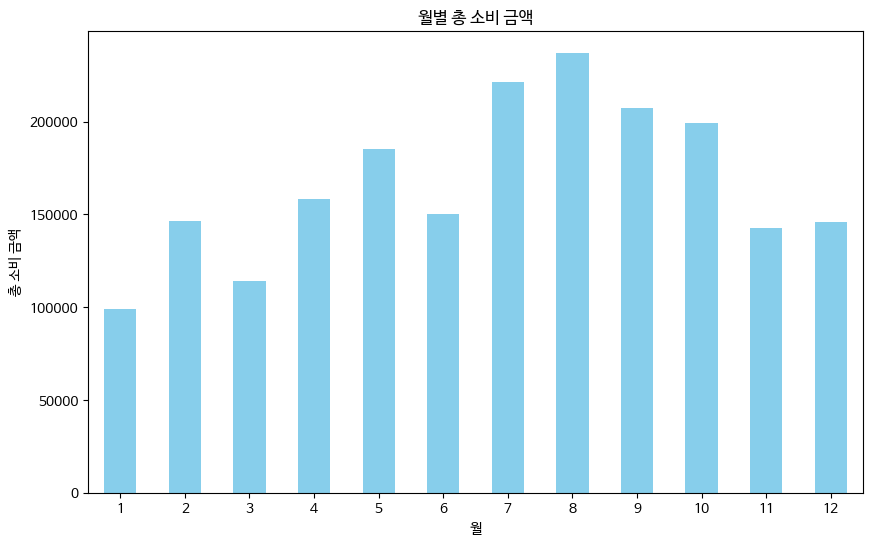

In [6]:
monthly_consumption = data_2020.groupby('기준월')['지수_이용금액'].sum()
# 기준월로 그룹화 -> 지수 이용금액 합계

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 6))
monthly_consumption.plot(kind='bar', color='skyblue')
plt.xlabel('월')
plt.ylabel('총 소비 금액')
plt.title('월별 총 소비 금액')
plt.xticks(rotation=0) #수평으로 보기
plt.show()

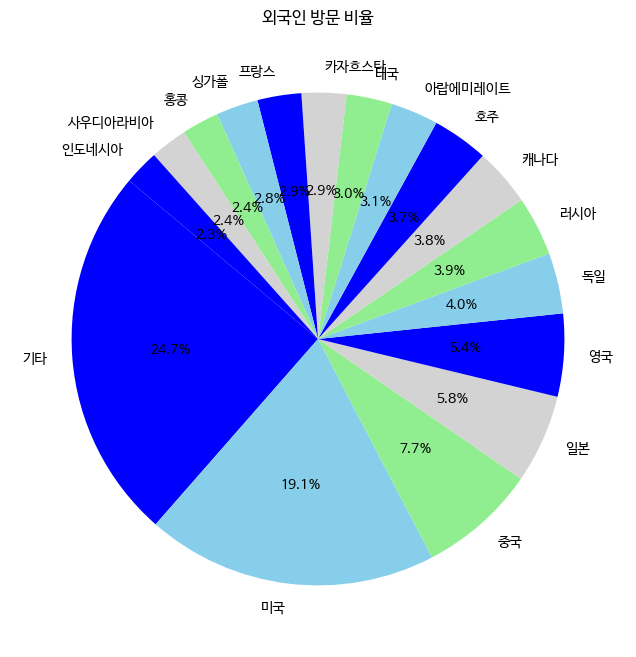

In [7]:
nationality_counts = data_2020['국적'].value_counts()
#데이터프레임에서 국적 기준으로 세서 저장하기

total_count = nationality_counts.sum()
# 모든 방문자 합산
nationality_percentages = (nationality_counts / total_count) * 100
# 국적 별 비율 계산

other_categories = nationality_percentages[nationality_percentages <= 2].index
data_2020['국적'] = data_2020['국적'].apply(lambda x: '기타' if x in other_categories else x)
#2% 이하인 국적들을 other_categories 변수에 저장하고 기타로 바꾸기

final_counts = data_2020['국적'].value_counts()
# 기타로 한 후에 final로 다시 해서 정리

plt.figure(figsize=(8, 8))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', colors=['blue', 'skyblue', 'lightgreen', 'lightgray'], startangle=140)
# 소숫점 첫재짜리까지만 하게
plt.title('외국인 방문 비율')
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import chardet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import geopandas as gpd

In [9]:
folder_path = '/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/대전광역시 유성구_법정동별 외국인 소비 금액 데이터_20221231'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
#csv 읽어오기~~

In [10]:
dfs = []
#읽어온 거 저장하기

for file in csv_files:
    with open(file, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']
        #하나씩 빈 리스트에 넣어서 처리

    df = pd.read_csv(file, encoding=encoding)
    dfs.append(df)
    #읽어들인 DataFrame을 dfs 리스트에 추가

In [11]:
# 행 단위 데이터프레임 병합
df = pd.concat(dfs)
df

# 데이터 프레임 오름차순 정렬
df = df.sort_values(by=['기준년', '기준월'], ascending=[True, True]).reset_index(drop=True)
df

,기준년,기준월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,표준산업대분류코드,표준산업대분류명,국적,휴일평일구분,지수_이용건수,지수_이용금액
0,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,G,도매 및 소매업(45-47),미국,평일,100.0,100.00
1,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,G,도매 및 소매업(45-47),미국,휴일,100.0,100.00
2,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,G,도매 및 소매업(45-47),일본,평일,100.0,100.00
3,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,H,운수 및 창고업(49-52),미국,평일,100.0,100.00
4,2020,1,30,대전광역시,30200,유성구,3020010100,원내동,H,운수 및 창고업(49-52),미국,휴일,100.0,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,2022,12,30,대전광역시,30200,유성구,3020014700,송강동,I,숙박 및 음식점업(55-56),홍콩,평일,100.0,149.02
33847,2022,12,30,대전광역시,30200,유성구,3020014700,송강동,M,전문 과학 및 기술 서비스업(70-73),아랍에미레이트,평일,100.0,100.00
33848,2022,12,30,대전광역시,30200,유성구,3020014700,송강동,M,전문 과학 및 기술 서비스업(70-73),아랍에미레이트,휴일,100.0,100.00
33849,2022,12,30,대전광역시,30200,유성구,3020014700,송강동,Q,보건업 및 사회복지 서비스업(86-87),미국,평일,200.0,1395.38


<ipython-input-38-8d326ef6c545>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


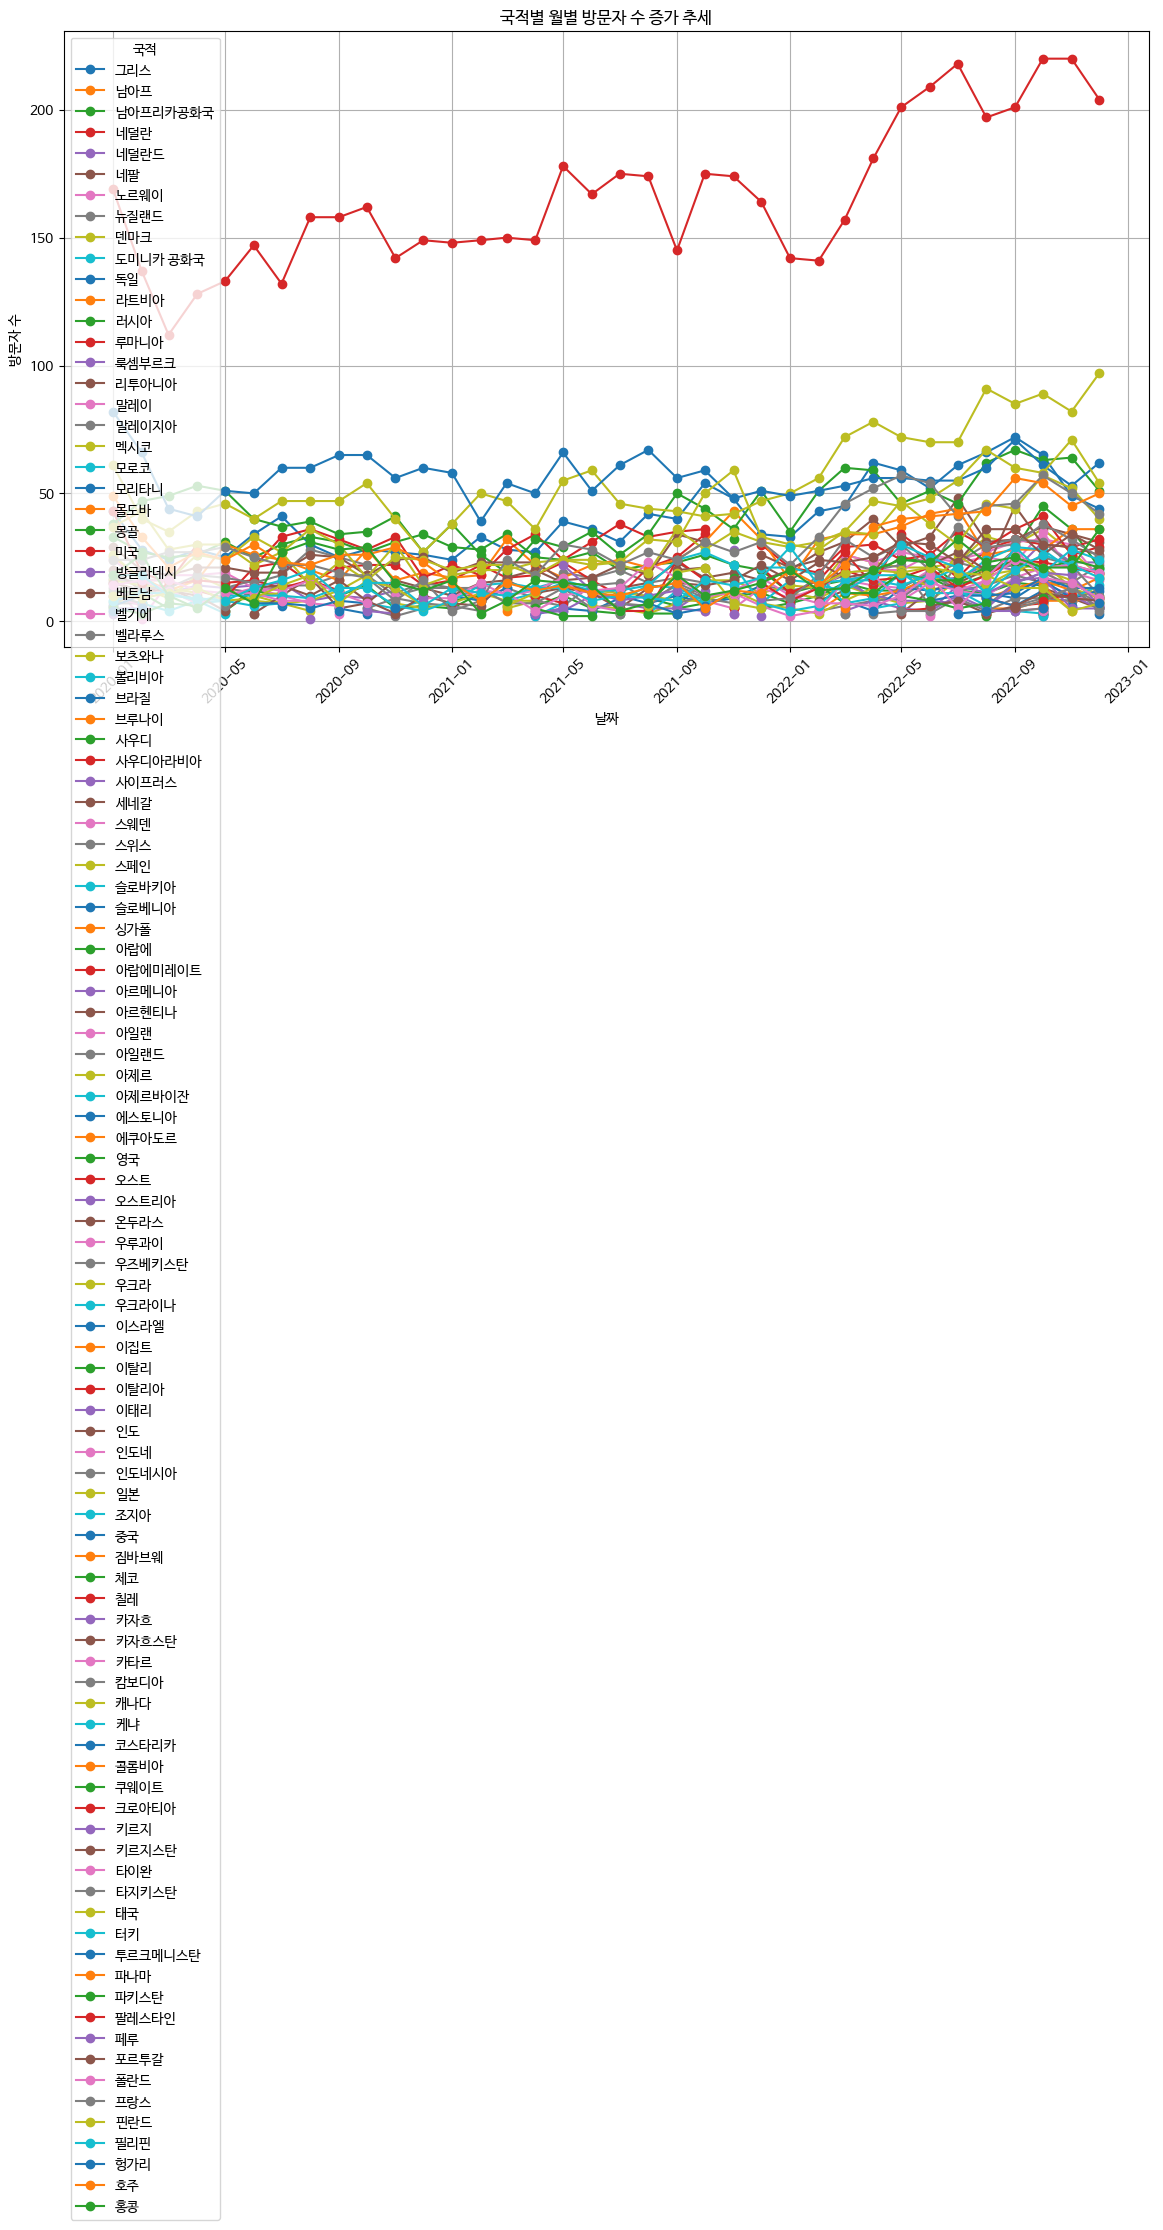

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# `기준년월` 열 생성
df['기준년월'] = df['기준년'].astype(str) + '-' + df['기준월'].astype(str).str.zfill(2)  # YYYY-MM 형식

# `국적`별 월별 방문자 수 집계
monthly_visitors_by_nationality = df.groupby(['기준년월', '국적']).size().unstack()

# 데이터프레임으로 변환
monthly_visitors_by_nationality_df = monthly_visitors_by_nationality.reset_index()
monthly_visitors_by_nationality_df['기준년월'] = pd.to_datetime(monthly_visitors_by_nationality_df['기준년월'], format='%Y-%m')
# 시각화
plt.figure(figsize=(14, 8))

# 각 국적별로 꺾은선 그래
for nationality in monthly_visitors_by_nationality.columns[1:]:  # 첫 번째 열은 '기준년월' 제외
    plt.plot(monthly_visitors_by_nationality_df['기준년월'], monthly_visitors_by_nationality[nationality], marker='o', linestyle='-', label=nationality)

# 그래프 레이블 및 제목 설정
plt.xlabel('날짜')
plt.ylabel('방문자 수')
plt.title('국적별 월별 방문자 수 증가 추세')
plt.legend(title='국적')
plt.grid(True)

# x축 레이블의 회전 설정
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()

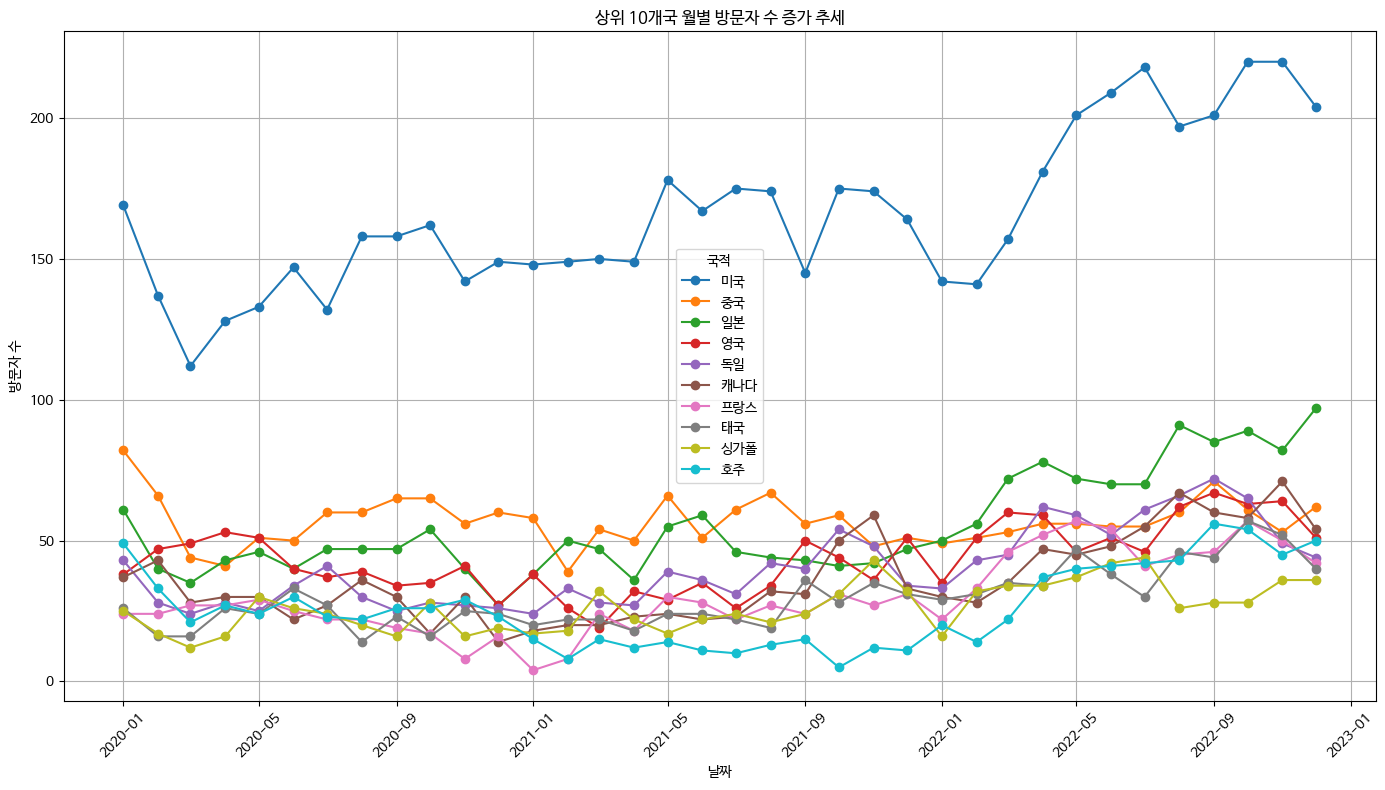

In [39]:
df['기준년월'] = df['기준년'].astype(str) + '-' + df['기준월'].astype(str).str.zfill(2)  # YYYY-MM 형식

monthly_visitors_by_nationality = df.groupby(['기준년월', '국적']).size().unstack()

monthly_visitors_by_nationality_df = monthly_visitors_by_nationality.reset_index()
monthly_visitors_by_nationality_df['기준년월'] = pd.to_datetime(monthly_visitors_by_nationality_df['기준년월'], format='%Y-%m')

# 총 방문자 수 기준으로 상위 10개국 추출
total_visitors_by_nationality = monthly_visitors_by_nationality.sum()
top_10_nationalities = total_visitors_by_nationality.nlargest(10).index

# 상위 10개국 데이터 필터링
top_10_visitors_by_nationality = monthly_visitors_by_nationality[top_10_nationalities]

plt.figure(figsize=(14, 8))

for nationality in top_10_nationalities:
    plt.plot(monthly_visitors_by_nationality_df['기준년월'], top_10_visitors_by_nationality[nationality], marker='o', linestyle='-', label=nationality)

plt.xlabel('날짜')
plt.ylabel('방문자 수')
plt.title('상위 10개국 월별 방문자 수 증가 추세')
plt.legend(title='국적')
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [37]:
df['지수_이용금액'] = df['지수_이용금액'].astype(int)
#float로 되어잇을 수도 잇어서 정수 필요할때 쓸려고 int로 답 ㅕㄴ경

In [13]:
df.to_csv('/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/Newdataframe.csv', index=False)

In [14]:
df = pd.read_csv('/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/Newdataframe.csv')

In [15]:
df.describe()

,기준년,기준월,광역시도코드,시군구코드,법정동코드,지수_이용건수,지수_이용금액
count,33851.000000,33851.000000,33851.0,33851.0,3.385100e+04,33851.000000,3.385100e+04
mean,2021.192875,6.851703,30.0,30200.0,3.020012e+09,211.326034,8.017755e+02
std,0.830506,3.371439,0.0,0.0,1.113859e+03,452.718530,1.069641e+04
min,2020.000000,1.000000,30.0,30200.0,3.020010e+09,1.690000,0.000000e+00
25%,2020.000000,4.000000,30.0,30200.0,3.020012e+09,97.220000,5.000000e+01
50%,2021.000000,7.000000,30.0,30200.0,3.020012e+09,100.000000,1.000000e+02
75%,2022.000000,10.000000,30.0,30200.0,3.020013e+09,200.000000,2.450000e+02
max,2022.000000,12.000000,30.0,30200.0,3.020015e+09,17433.330000,1.106583e+06


In [16]:
# 좌표 찎어서 뵉
shape_oa = gpd.read_file("/content/drive/MyDrive/2024 머신 코스 - 1/대전_외국인_소비금액/읍면동/emd.shp", encoding = "cp949")

In [17]:
shape_oa

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
5061,52800390,Sangseo-myeon,상서면,"POLYGON ((924979.638 1740610.214, 924985.428 1..."
5062,52800400,Haseo-myeon,하서면,"POLYGON ((924910.563 1749481.985, 924971.300 1..."
5063,52800410,Julpo-myeon,줄포면,"POLYGON ((929554.188 1736493.399, 929554.106 1..."
5064,52800420,Wido-myeon,위도면,"MULTIPOLYGON (((890358.231 1737258.351, 890358..."


In [18]:
type(shape_oa)

geopandas.geodataframe.GeoDataFrame

In [19]:
shape_oa.crs

<Projected CRS: PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM[" ...>
Name: PCS_ITRF2000_TM
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: International Terrestrial Reference Frame 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
shape_oa.geometry = shape_oa.geometry.to_crs("EPSG:4326")
# 공간 데이터 여기 반환시키기

shape_oa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
shape_oa["x"] = shape_oa["geometry"].centroid.x
# 지오메트리 중심점 계산
# 폴리곤 중심점 반환하기
shape_oa["y"] = shape_oa["geometry"].centroid.y
#포인트에 y 출력하고
#y를 shape_oa 저장

shape_oa

<ipython-input-21-29a6e8752782>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_oa["x"] = shape_oa["geometry"].centroid.x
<ipython-input-21-29a6e8752782>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_oa["y"] = shape_oa["geometry"].centroid.y


,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry,x,y
0,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589...",126.969324,37.589205
1,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584...",126.967942,37.584506
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586...",126.972706,37.584698
3,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582...",126.971953,37.582668
4,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581...",126.972474,37.580560
...,...,...,...,...,...,...
5061,52800390,Sangseo-myeon,상서면,"POLYGON ((126.67119 35.65883, 126.67125 35.658...",126.645686,35.669001
5062,52800400,Haseo-myeon,하서면,"POLYGON ((126.66959 35.73881, 126.67028 35.737...",126.627870,35.713065
5063,52800410,Julpo-myeon,줄포면,"POLYGON ((126.72208 35.62205, 126.72208 35.621...",126.694398,35.592571
5064,52800420,Wido-myeon,위도면,"MULTIPOLYGON (((126.28921 35.62538, 126.28921 ...",126.266606,35.602457


In [22]:
# df 기반 피봇 생성하고 지수_이용금액을 열로 사용함
pivot = pd.pivot_table(df, values='지수_이용금액', index='법정동코드', aggfunc='sum').reset_index()
pivot.rename(columns = {'법정동코드' : 'EMD_CD'}, inplace=True)
# 열 이름 변경 / inplace로 피봇엣 열 이름 변경되게
pivot['EMD_CD'] = pivot['EMD_CD'].astype(str).str[:-2]
#법정동 두 자리 잘라내기

In [24]:
result = pd.merge(pivot, shape_oa, how='left', on='EMD_CD')
#머지로 pivor df & shape~ df 병함
result

,EMD_CD,지수_이용금액,EMD_ENG_NM,EMD_KOR_NM,geometry,x,y
0,30200101,215681,Wonnae-dong,원내동,"POLYGON ((127.32041 36.30971, 127.32043 36.309...",127.320124,36.298993
1,30200102,15357,Gyochon-dong,교촌동,"POLYGON ((127.31945 36.30979, 127.31973 36.309...",127.311065,36.307024
2,30200103,115030,Daejeong-dong,대정동,"POLYGON ((127.33904 36.31325, 127.33904 36.313...",127.316477,36.316224
3,30200104,65276,Yonggye-dong,용계동,"POLYGON ((127.31167 36.32799, 127.31170 36.328...",127.324990,36.325228
4,30200105,20533,Hakha-dong,학하동,"POLYGON ((127.31170 36.32795, 127.31154 36.327...",127.314441,36.334536
5,30200106,149960,Gyesan-dong,계산동,"POLYGON ((127.31175 36.32727, 127.31170 36.327...",127.296307,36.334790
6,30200108,100,Se-dong,세동,"POLYGON ((127.26066 36.30185, 127.25998 36.302...",127.271308,36.302764
7,30200109,3823,Songjeong-dong,송정동,"POLYGON ((127.26645 36.27363, 127.26631 36.273...",127.260590,36.287137
8,30200110,9691,Bang-dong,방동,"POLYGON ((127.27294 36.28122, 127.27319 36.281...",127.293454,36.278238
9,30200111,2362732,Bongmyeong-dong,봉명동,"POLYGON ((127.36279 36.36338, 127.36237 36.362...",127.346072,36.353590


In [25]:
result = gpd.GeoDataFrame(result, geometry='geometry')

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:967: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


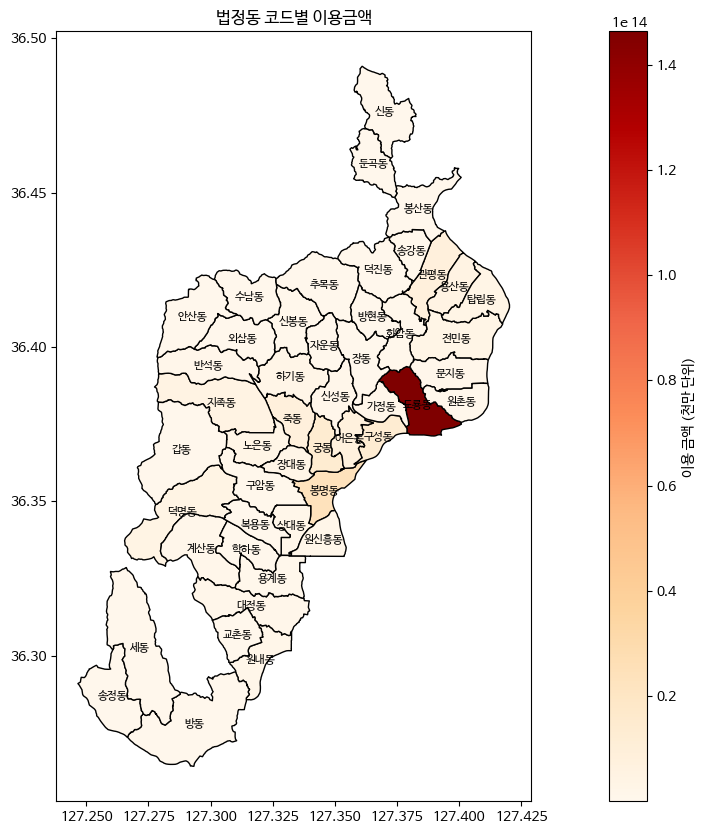

In [32]:
# 이용 금액을 천만 단위로 조정
result['지수_이용금액'] = result['지수_이용금액']

# 데이터 정렬
result_sorted = result.sort_values(by='지수_이용금액', ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(20, 10))

# result_sorted를 사용하여 시각화
result_sorted.plot(ax=ax, column='지수_이용금액', legend=True, cmap='OrRd', edgecolor='black',
                    legend_kwds={'label': "이용 금액 (천만 단위)", 'orientation': "vertical"})

plt.title('법정동 코드별 이용금액')

# 법정동 이름 추가
for idx, row in result_sorted.iterrows():
    x, y = row['x'], row['y']
    ax.text(x, y, f"{row['EMD_KOR_NM']}", fontsize=8, ha='center', va='center')

plt.show()